In [1]:
# Add your imports here

import os
import networkx as nx
from networkx.algorithms import bipartite

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
project_path = os.getcwd() + '/'

browser_data_path = 'data/'
pycharm_data_path = project_path + 'hw_1/data/'

selected_data_path = browser_data_path
# selected_data_path = pycharm_data_path

fr_dish_choice_data_path = selected_data_path + 'Friends_Dish_Choices.txt'
fr_relation_data_path = selected_data_path + 'Friends_Relation.txt'

In [3]:
def parse_custom(file_path):
    with open(file_path) as f:
        file_content = f.readlines()
        
    return [x.strip('\n').strip('\r').split('\t')[1:] for x in file_content][1:]


In [4]:
fr_dish_choice_file_content = parse_custom(fr_dish_choice_data_path)

list_of_friends = set([item[0] for item in fr_dish_choice_file_content])

# fr_dish_choice_file_content_nodes = set([item for sublist in fr_dish_choice_file_content for item in sublist])

# print fr_dish_choice_file_content_nodes


In [5]:
G_fr_dish_choice = nx.Graph()

# G_fr_dish_choice.add_nodes_from(fr_dish_choice_file_content_nodes)

for relationship in fr_dish_choice_file_content:
    G_fr_dish_choice.add_edge(relationship[0], relationship[1])

print G_fr_dish_choice.edges()

[('Laiba', 'Karahi'), ('Laiba', 'Fish'), ('Laiba', 'Mandi'), ('Vali', 'Suji Halwa'), ('Vali', 'Nihari'), ('Vali', 'Seekh Kabab'), ('Jahanzaib', 'Karahi'), ('Jahanzaib', 'Fish'), ('Jahanzaib', 'Mandi'), ('Anas', 'Chicken Handi'), ('Anas', 'Afgani Tikkah'), ('Anas', 'Mandi'), ('Sindhi Biryani', 'Ghaffar'), ('Sindhi Biryani', 'Chand'), ('Ghaffar', 'Afgani Tikkah'), ('Ghaffar', 'Mutton Pulao'), ('Seekh Kabab', 'Paras'), ('Seekh Kabab', 'Faiza'), ('Daal Chawal', 'Paras'), ('Paras', 'Chicken Handi'), ('Chicken Handi', 'Faiza'), ('Chand', 'Afgani Tikkah'), ('Chand', 'Mutton Pulao'), ('Faiza', 'Suji Halwa')]


In [6]:
def getNodeType(node):
    if node in list_of_friends:
        return 'Friend'
    else:
        return 'Dish'


In [7]:
for node in G_fr_dish_choice.nodes():
    G_fr_dish_choice.node[node]['type'] = getNodeType(node)

print G_fr_dish_choice.nodes(data=True)

[('Laiba', {'type': 'Friend'}), ('Vali', {'type': 'Friend'}), ('Jahanzaib', {'type': 'Friend'}), ('Anas', {'type': 'Friend'}), ('Sindhi Biryani', {'type': 'Dish'}), ('Ghaffar', {'type': 'Friend'}), ('Seekh Kabab', {'type': 'Dish'}), ('Fish', {'type': 'Dish'}), ('Daal Chawal', {'type': 'Dish'}), ('Paras', {'type': 'Friend'}), ('Karahi', {'type': 'Dish'}), ('Nihari', {'type': 'Dish'}), ('Chicken Handi', {'type': 'Dish'}), ('Chand', {'type': 'Friend'}), ('Faiza', {'type': 'Friend'}), ('Afgani Tikkah', {'type': 'Dish'}), ('Mandi', {'type': 'Dish'}), ('Suji Halwa', {'type': 'Dish'}), ('Mutton Pulao', {'type': 'Dish'})]


In [8]:
friends, dishes = nx.bipartite.sets(G_fr_dish_choice)

G_bipartite_dishes = nx.bipartite.weighted_projected_graph(G_fr_dish_choice, dishes)

G_bipartite_friends = nx.bipartite.weighted_projected_graph(G_fr_dish_choice, friends)


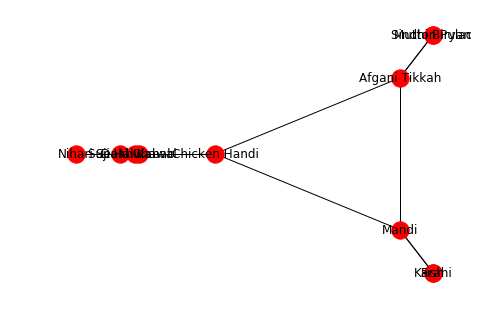

In [9]:
nx.draw_spectral(G_bipartite_dishes, with_labels=True)

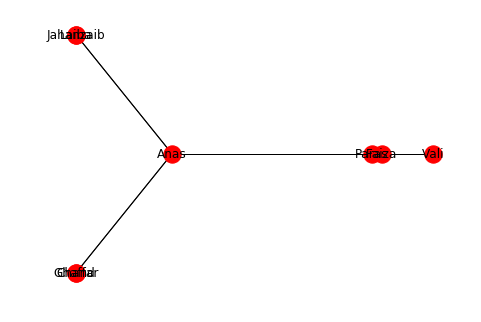

In [10]:
nx.draw_spectral(G_bipartite_friends, with_labels=True)

In [11]:
fr_relation_file_content = parse_custom(fr_relation_data_path)

G_fr_relation_choice = nx.Graph()

for nodes in fr_relation_file_content:
    G_fr_relation_choice.add_edge(nodes[0], nodes[1])

print G_fr_relation_choice.edges()

[('Vali', 'Anas'), ('Vali', 'Ghaffar'), ('Vali', 'Paras'), ('Vali', 'Laiba'), ('Vali', 'Chand'), ('Vali', 'Faiza'), ('Vali', 'Jahanzaib'), ('Anas', 'Laraib'), ('Anas', 'Ghaffar'), ('Anas', 'Paras'), ('Anas', 'Chand'), ('Anas', 'Faiza'), ('Anas', 'Jahanzaib'), ('Ghaffar', 'Paras'), ('Ghaffar', 'Chand'), ('Ghaffar', 'Faiza'), ('Ghaffar', 'Jahanzaib'), ('Ghaffar', 'Laraib'), ('Paras', 'Laiba'), ('Paras', 'Chand'), ('Paras', 'Faiza'), ('Paras', 'Jahanzaib'), ('Chand', 'Faiza'), ('Chand', 'Jahanzaib'), ('Chand', 'Laraib'), ('Faiza', 'Jahanzaib'), ('Faiza', 'Laraib'), ('Jahanzaib', 'Laraib')]
